In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from sklearn.neighbors import DistanceMetric
from math import radians
import re
from googletrans import Translator
import plotly.express as px

In [79]:
# Data frame for the starbucks locations
starbucks = pd.read_csv('directory.csv')

#Create a new column for store count
starbucks['store_count'] = np.ones(starbucks.shape[0]).astype(int).tolist()

#Read the country code file into the dateframe.
country_code = pd.read_csv('country_code.csv')


#Dataframe for the world population
world_population = pd.read_csv('world_population.csv')
world_population = world_population[['country', 'population']]
world_population['population']= world_population['population'].str.replace(',', '').astype(float)


#DataFrame for the gdp
gdp=pd.read_csv('gdp.csv')

#DataFrame for city population
city_pop= pd.read_csv('urban.csv')
city_pop['area_km2'] = city_pop['area_km2'].str.replace(',', '').astype(float)
city_pop['area_mi2'] = city_pop.area_km2.apply(lambda x :  x*0.39)
city_pop['city_pop'] = city_pop['city_pop'].str.replace(',', '').astype(float)


starbucks.sample(5)



,Brand,Store Number,store_name,Ownership_Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,store_count
21970,Starbucks,49585-269685,Albertsons - Baker City #3211,Licensed,1120 Campbell St.,Baker City,OR,US,97814,5415192449,GMT-08:00 America/Los_Angeles,-117.82,44.78,1
21081,Starbucks,23901-233644,Latham Plaza,Company Owned,1210 Troy Schenectady Road,Latham,NY,US,12110,518 7647116,GMT-05:00 America/New_York,-73.82,42.77,1
8075,Starbucks,22029-217025,Yeongdeungpo Singil DT,Joint Venture,252-9.Singil-dong Yeongdeungpo-gu,Seoul,11,KR,150-841,NaN,GMT+09:00 Asia/Seoul,126.91,37.50,1
14601,Starbucks,10012-98199,"Hwy 905 & La Media, San Diego",Company Owned,"8299 Otay Mesa Road, D",San Diego,CA,US,921547701,619-710-0082,GMT-08:00 America/Tijuana,-116.97,32.57,1
24653,Starbucks,72918-92406,Fred Meyer - Bellevue #23,Licensed,2041 148th NE,Bellevue,WA,US,980073788,425-865-8560,GMT-08:00 America/Los_Angeles,-122.14,47.63,1


In [80]:
#Merge the starbucks data frame and the country code
starbucks1= pd.merge(starbucks,country_code, left_on='Country', how='left',right_on='Two_Letter_Country_Code').drop('Two_Letter_Country_Code', axis=1)
starbucks1.sample(2)


#Modify the name of some countries, removing 'the, republic of'
country_name = starbucks1['Country_Name'].tolist()

country_name = [country.split(',')[0] for country in country_name]

#Assign the modified values in the country_name column
starbucks1['Country_Name'] = country_name


#Change united states of america to united states
starbucks1['Country_Name']= starbucks1['Country_Name'].apply(lambda x : 'United States' if x=='United States of America' else x)

#Change Russian Federation to Russia
starbucks1['Country_Name']= starbucks1['Country_Name'].apply(lambda x : 'Russia' if x=='Russian Federation' else x)


starbucks1['Country_Name']= starbucks1['Country_Name'].apply(lambda x : 'South Korea' if x=='Korea' else x)

#Change Russian Federation to Russia
starbucks1['Country_Name']= starbucks1['Country_Name'].apply(lambda x : 'Czech Republic' if x=='Czech Republic (Czechia)' else x)

starbucks1.sample(5)



,Brand,Store Number,store_name,Ownership_Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,store_count,Continent_Name,Country_Name
11665,Starbucks,30872-101240,Starbucks,Licensed,"Incirli Cad. Town Center, No:11 K:Giris D:208",Istanbul,34,TR,34147,9.02E+11,GMT+2:00 Europe/Istanbul,28.87,40.98,1,Asia,Turkey
11977,Starbucks,32370-133125,Starbucks,Licensed,"Eski Golcuk Yolu Outlet Center, Izmit D:B501",Izmit,41,TR,41000,0 262 335 32 30,GMT+2:00 Asia/Istanbul,29.95,40.75,1,Asia,Turkey
1452,Starbucks,75525-35359,Marriott Niagara Falls View,Licensed,6740 Fallsview Blvd,Niagara Falls,ON,CA,L2G 3W6,905-357-7300,GMT-05:00 America/New_York,-79.08,43.08,1,North America,Canada
22063,Starbucks,2307-1291,200 Public Square,Company Owned,"200 Public Square, Suite 130",Cleveland,OH,US,441142316,(216) 621-4883,GMT-05:00 America/New_York,-81.69,41.50,1,North America,United States
23452,Starbucks,3572-86323,MTSU - James Walker Library,Licensed,1611 Alumni Dr,Murfreesboro,TN,US,37132,615-294-0738,GMT-06:00 America/Chicago,-86.36,35.85,1,North America,United States


In [81]:
#Merge world population data with starbucks data 
starbucks2= pd.merge(starbucks1, world_population, how='left', left_on='Country_Name', right_on='country')
starbucks2.sample(5)


#Merge gdp data with starbucks data 
starbucks3= pd.merge(starbucks2, gdp, how='left', left_on='Country_Name', right_on='country')
starbucks3.shape

#merge starbucks3 and city_population
starbucks3.set_index('City', inplace=True)
starbucks3.rename(index={'上海市':'Shanghai', '北京市':'Beijing','서울':'Seoul', '杭州市':'Hangzhou', '深圳市':'Shenzhen',
                            '广州市' : 'Guangzhou','成都市':'Chengdu', '苏州市':'Suzhou','مدينة الكويت':'Kuwait City',
                         '南京市':'Nanjing', '武汉市':'Wuhan'}, inplace=True)


starbucks3.reset_index(inplace=True)

#Merge starbucks data with city population
starbucks4 = pd.merge(starbucks3, city_pop, how='left', left_on='City', right_on='city2')
starbucks4.shape


#Change column names to lower case
starbucks4.columns = [x.lower()  for x in starbucks4.columns]
starbucks4.sample(4)


#Drop duplicate columns
starbucks4.drop(["country_x","country_y", "country2", "brand","store number", "store_name" ,"street address", "state/province",
                  "timezone", "city2", 'phone number', 'postcode'], axis=1, inplace=True)
starbucks4.sample(5)



#Rename some columns
starbucks4.rename(columns={'country':'code2', 'continent_name':'continent', 'country_name':'country', 'code':'code3'}, inplace=True)
starbucks4.set_index('city', inplace=True)

starbucks4.reset_index(inplace=True)
starbucks4.sample(5)



,city,ownership_type,code2,longitude,latitude,store_count,continent,country,population,code3,gdp_ppp,area_km2,city_pop,area_mi2
22131,Dayton,Licensed,US,-84.10,39.66,1,North America,United States,3.310027e+08,USA,2.140000e+13,NaN,NaN,NaN
4596,昆明市,Company Owned,CN,102.73,25.05,1,Asia,China,1.439324e+09,CHN,2.350000e+13,NaN,NaN,NaN
7784,Kobe,Company Owned,JP,135.18,34.68,1,Asia,Japan,1.264765e+08,JPN,5.460000e+12,NaN,NaN,NaN
1651,Toronto,Company Owned,CA,-79.39,43.65,1,North America,Canada,3.774215e+07,CAN,1.930000e+12,630.0,2731571.0,245.7
17861,Boise,Company Owned,US,-116.21,43.60,1,North America,United States,3.310027e+08,USA,2.140000e+13,NaN,NaN,NaN


In [82]:
def condition(x):
    """
    This function rename continents into regions
    x :  is a string value from a data frame column
    returns a string
    """
    
    if (x=='Europe' or x=='Africa'):
        return f'Europe_Africa'
    elif (x =='Asia' or x =='Oceania'):
        return f'Asia_Oceania'
    else:
        return f'Americas'
    

#Create a new column 'region'  
starbucks4['region']= starbucks4['continent'].apply(lambda x : condition(x))
starbucks4.sample(4)



,city,ownership_type,code2,longitude,latitude,store_count,continent,country,population,code3,gdp_ppp,area_km2,city_pop,area_mi2,region
3459,嘉兴市,Joint Venture,CN,120.93,30.84,1,Asia,China,1.439324e+09,CHN,2.350000e+13,NaN,NaN,NaN,Asia_Oceania
9696,Hermosillo,Licensed,MX,-110.95,29.10,1,North America,Mexico,1.289328e+08,MEX,2.600000e+12,NaN,NaN,NaN,Americas
25750,Tacoma,Company Owned,US,-122.44,47.25,1,North America,United States,3.310027e+08,USA,2.140000e+13,NaN,NaN,NaN,Americas
2712,Shanghai,Joint Venture,CN,121.54,31.23,1,Asia,China,1.439324e+09,CHN,2.350000e+13,6341.0,24183000.0,2472.99,Asia_Oceania


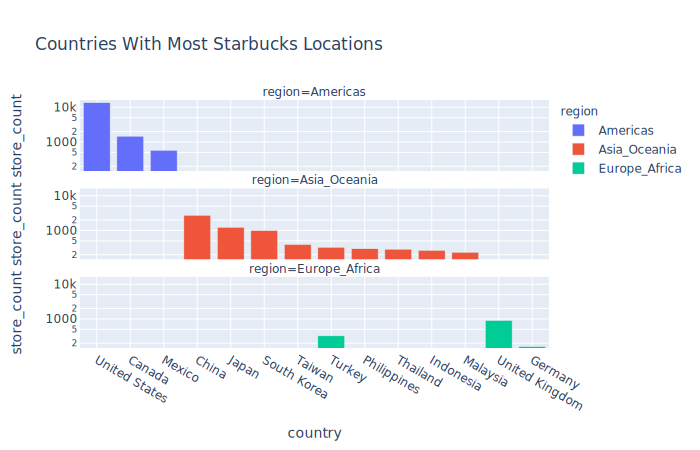

In [83]:
#Create a dataframe with the most starbucks store in the world
store_df = starbucks4[['country','region','store_count']].groupby(['country', 'region']).agg({'store_count':'sum'}).sort_values(ascending=False, by='store_count').head(15)

store_df.reset_index(inplace=True)
store_df

#Display a bar graph
fig= px.bar(store_df, x='country', y='store_count',title='Countries With Most Starbucks Locations', facet_col='region' , color='region',
                 facet_col_wrap=1, log_y=True)
fig.show('svg')

In [84]:
#Create a new data frame to include modified population values
df_scatter= starbucks4.groupby(['country', 'population', 'region', 'gdp_ppp', 'code2']).agg({'store_count':'sum'}).reset_index()
df_scatter.sample(5)

,country,population,region,gdp_ppp,code2,store_count
42,Norway,5421241.0,Europe_Africa,3.570000e+11,NO,17
12,Canada,37742154.0,Americas,1.930000e+12,CA,1468
57,South Korea,51269185.0,Asia_Oceania,2.220000e+12,KR,993
43,Oman,5106626.0,Asia_Oceania,1.450000e+11,OM,12
6,Bahrain,1701575.0,Asia_Oceania,7.695761e+10,BH,21


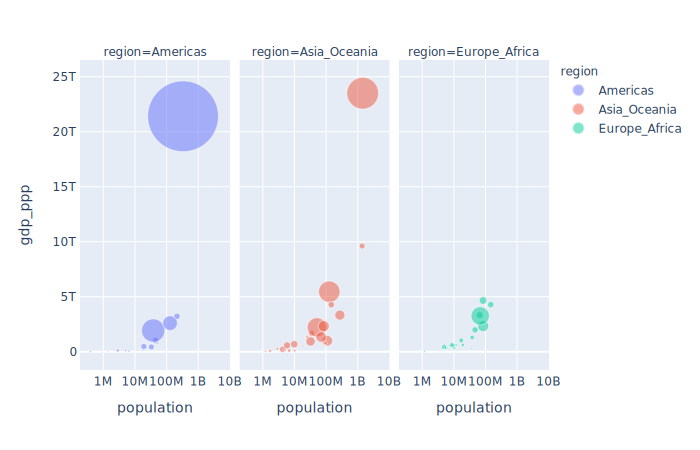

In [85]:
#Plot a scatter plot with population , gdp and store count
df = df_scatter
fig = px.scatter(df, x="population", y="gdp_ppp", size="store_count",
           hover_name="country", log_x=True, size_max=50, opacity=0.5, color='region', facet_col='region')
fig.show('svg')



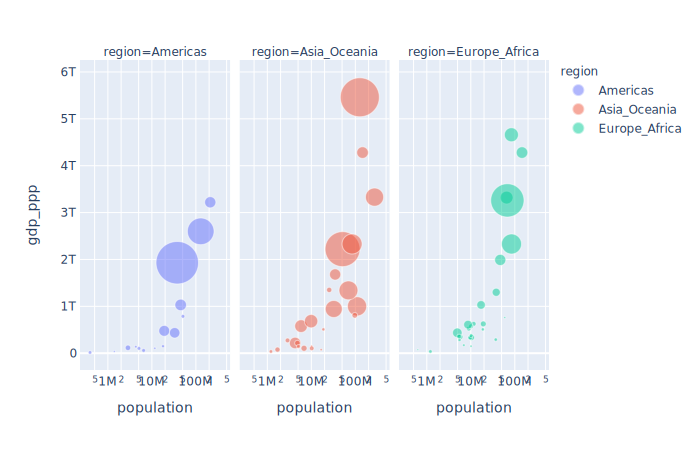

In [86]:
#Create a new data frame without us, china and india
df_scatter2=df_scatter.loc[(df_scatter.country !='United States') & (df_scatter.country !='China') & (df_scatter.country !='India')]

#Graph the new dataframe
df = df_scatter2
fig = px.scatter(df, x="population", y="gdp_ppp", size="store_count",color='region',
           hover_name="country", log_x=True, size_max=30, opacity=0.5, facet_col='region')
fig.show('svg')


In [88]:
city_df= starbucks4[['city','store_count']]
city_df=city_df.set_index('city')

city_df1 = city_df.groupby('city').agg({'store_count':'sum'}).sort_values(by='store_count').tail(20)
city_df1.reset_index(inplace=True)
city_df1

#Display a bar graph
fig = px.bar(city_df1, y='city', x ='store_count', title='Cities With Most Starbucks Locations', orientation='h', hover_name='city')
fig.show()


In [76]:
city_df3 = city_df.groupby('city').agg({'store_count':'sum'})
city_df3.reset_index(inplace=True)


city_df4 = starbucks4[['city', 'gdp_ppp', 'city_pop', 'area_mi2']]

city_df4= city_df4.loc[(city_df4.city_pop > 5e5) & (city_df4.gdp_ppp>5e11)]



city_df5 = pd.merge(city_df3, city_df4,left_on='city', right_on='city')
city_df5.dropna(inplace=True)
city_df5



city_df5['pop_density'] = city_df5['city_pop'] /(city_df5['area_mi2'] *10)
city_df5
city_df5['store_density']=city_df5['store_count'] *10 /city_df5['area_mi2']
city_df5


,city,store_count,gdp_ppp,city_pop,area_mi2,pop_density,store_density
0,Bangalore,10,9.610000e+12,8443675.0,276.51,3053.659904,0.361651
1,Bangalore,10,9.610000e+12,8443675.0,276.51,3053.659904,0.361651
2,Bangalore,10,9.610000e+12,8443675.0,276.51,3053.659904,0.361651
3,Bangalore,10,9.610000e+12,8443675.0,276.51,3053.659904,0.361651
4,Bangalore,10,9.610000e+12,8443675.0,276.51,3053.659904,0.361651
...,...,...,...,...,...,...,...
4723,Wuhan,67,2.350000e+13,10892900.0,3312.66,328.826381,0.202254
4724,Wuhan,67,2.350000e+13,10892900.0,3312.66,328.826381,0.202254
4725,Wuhan,67,2.350000e+13,10892900.0,3312.66,328.826381,0.202254
4726,Wuhan,67,2.350000e+13,10892900.0,3312.66,328.826381,0.202254


In [89]:

# fig = px.scatter(city_df5, y="pop_density", x="store_density", size='store_count', color='city',
#                  )
# fig.show()

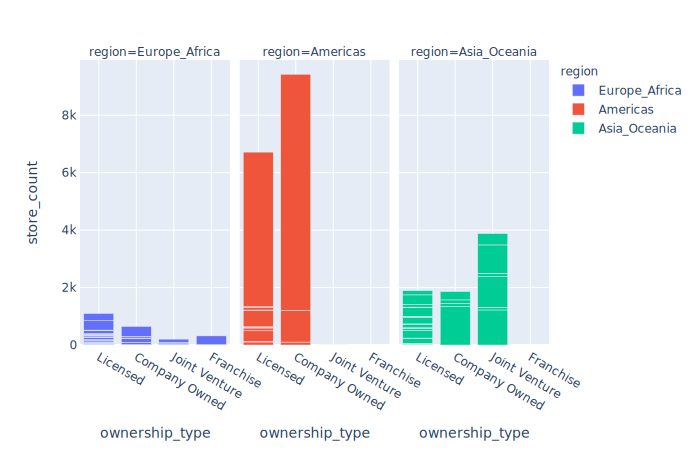

In [90]:
#Create a new data frame
own_df = starbucks4.loc[:,['ownership_type', 'store_count', 'continent', 'country', 'region']]

#Group each continent by rehions
own_df = own_df.groupby(['country','ownership_type', 'region']).agg({'store_count':'sum'}).reset_index()

#Diplay a bar graph showing different rehions
fig = px.bar(own_df, x='ownership_type', y='store_count',facet_col='region', color='region',
             )
fig.show('svg')